# GDP Visualization Project - Stephen Ellingson

Hello! This project is part of my Data Analytics certication coursework through Codecademy. In this notebook, I'll be using Python code and importing matplotlib and seaborn libraries to visualize GDP data. It is completely open-ended in terms of how I should go about my analysis, and the only elements that have already been provided are the necessary csv file. 

I'll be overly descriptive with the steps of this process so you get an idea of what I've been taught in terms of best practices. Please feel free to get in touch if you would like to discuss anything relating to my work, and thank you for viewing!

### Step 1: Defining Objectives

Before I start digging into the data, I always make objectives to keep clear what I'm trying to come up with as an end result. In this case, my main objective is to work with GDP data **to explore and visualize the link between a country's GDP and its citizen's life expectancy at birth**. However, I'll also be doing some general visualizations to get other insights, as well.

### Step 2: Importing Libraries

In [158]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

### Step 3: Loading in Data

I'll make a pandas dataframe named "gdp_data" and read in my csv file.

In [159]:
gdp_data = pd.read_csv('all_data.csv')

### Step 4: Inspecting the Data

Here, I'll inspect the first fiew rows of data and the data types for each column. Then, to get a clearer picture of the range of data I have, I can take a look at the "Country" and "Year" columns.

In [160]:
print(gdp_data.head())
print(gdp_data.dtypes)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [161]:
print(gdp_data.Country.unique())
print("Life Expectancy Min: " + str(gdp_data['Year'].min()))
print("Life Expectancy Max: " + str(gdp_data['Year'].max()))

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Life Expectancy Min: 2000
Life Expectancy Max: 2015


Upon original inspection, everything looks fine, and I now know I'm working with six countries over a 15-year period.

### Step 5: Editing the Dataframe for Analysis

Before beginning my analysis, I have to check for elements that need changing within the dataframe to make my work easier. The column name for life expectancy is much too long, so I'll shorten it to "LEAB".

In [162]:
gdp_data.rename(columns = {'Life expectancy at birth (years)': 'LEAB'}, inplace=True)
print(gdp_data.head())

  Country  Year  LEAB           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


I also noticed that "United States of America" may be shortened to "USA" for easier visualization, so I'll change this as well.

In [163]:
gdp_data['Country'].replace({'United States of America': 'USA'}, inplace=True)
print(gdp_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


Now I can begin my analysis!

### Step 6: Visualization 1 - Average GDP by Country

As my first general visualization, I'm going to make a bar plot comparing each country's average GDP. This should give us an idea of where each country stands against each other for this 15-year period.

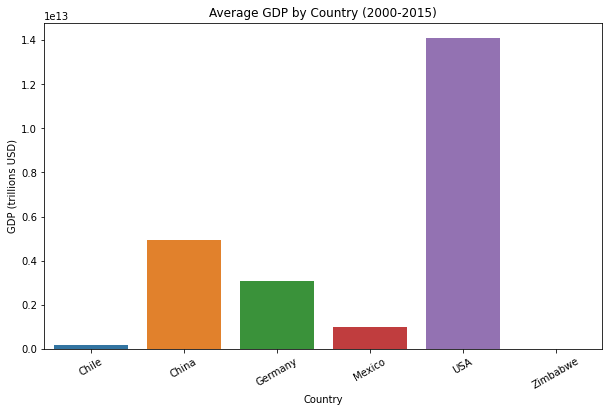

In [183]:
plt.figure(figsize = (10,6))
sns.set_palette('tab10')
sns.barplot(x = gdp_data.Country, y = gdp_data.GDP, data = gdp_data, ci = None)
plt.xticks(rotation = 30)
plt.title('Average GDP by Country (2000-2015)')
plt.ylabel('GDP (trillions USD)')
plt.show()

We can see here that USA leads the pack for average GDP within this time frame. China and Germany follow in second and third, respectively, while Zimbabwe's average GDP is so small that it's out of view on this graph.

### Step 7: Visualization 2 - Average LEAB by Country

Here, I'm going to do the same thing as above but with LEAB.

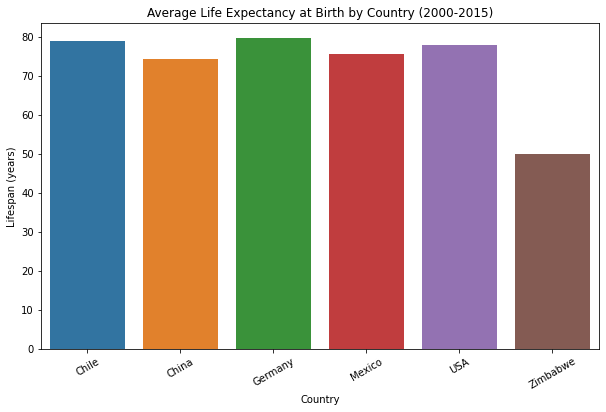

In [184]:
plt.figure(figsize = (10, 6))
sns.barplot(x = gdp_data.Country, y = gdp_data.LEAB, data = gdp_data, ci = None)
plt.xticks(rotation = 30)
plt.title('Average Life Expectancy at Birth by Country (2000-2015)')
plt.ylabel('Lifespan (years)')
plt.show()

Here we can see that average life expectancy is fairly similar between all countries except for Zimbabwe. Given the vast differences in GDP values in the last visualization, there isn't presently a great case for a link between GDP and LEAB. However, we're missing the element of time here by making averages, so let's look at some visualizations more geared for time series analysis. I'll display some graphs that analyze GDP and LEAB separately, and then I'll make a final visualization to analyze the relationship between these two variables.

### Step 7: Visualization 3 - GDP Over Time

Here, I'll make a line graph to how each country's GDP has changed over time. This will give us an idea of general trends. A particular anomaly to keep in mind is the 2008 financial crisis. Let's see if that shows up in the visualization!

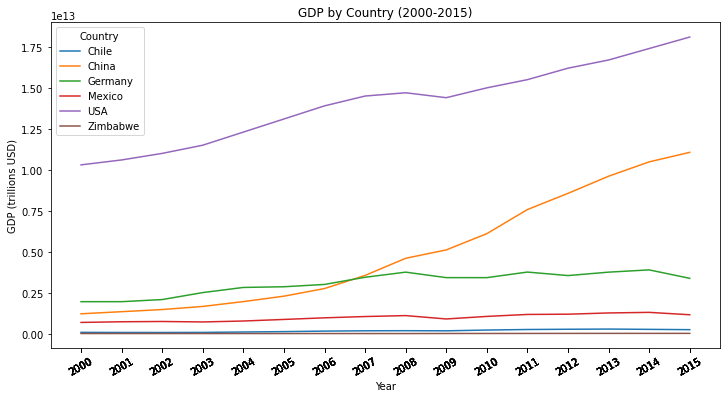

In [185]:
plt.figure(figsize = (12, 6))
ax = sns.lineplot(x = gdp_data.Year, y = gdp_data.GDP, hue = gdp_data.Country)
ax.set_xticks(gdp_data.Year)
plt.xticks(rotation = 30)
plt.title('GDP by Country (2000-2015)')
plt.ylabel('GDP (trillions USD)')
plt.show()

We can see that the financial crisis affected most of the countries' GDPs negatively from 2008 to 2009. USA, Germany, and Mexico had visible declines, and while China's GDP remained at a growth, there is a slight decrease in slope. 

### Step 8: Visualization 4 - LEAB Over Time

To satisfy my curiosity, I'm going to do the same visualization with LEAB and see if the financial crisis had any effect on this variable.

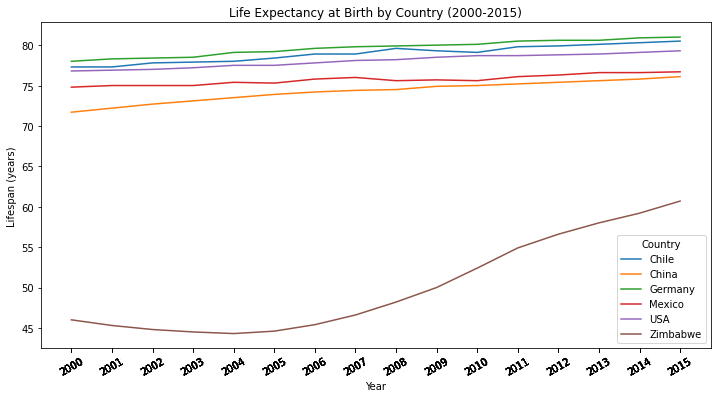

In [186]:
plt.figure(figsize = (12, 6))
ax = sns.lineplot(x = gdp_data.Year, y = gdp_data.LEAB, hue = gdp_data.Country)
ax.set_xticks(gdp_data.Year)
plt.xticks(rotation = 30)
plt.title('Life Expectancy at Birth by Country (2000-2015)')
plt.ylabel('Lifespan (years)')
plt.show()

We've definitely found an interesting outlier here! While it looks like the financial crisis had little to no effect on LEAB, Zimbabwe's life expectancy has vastly increased and at year 2015 is still approximately 15 years less than the next highest, which belongs to China. Now that we've seen some interesting general visualizations, let's take a look at some distributions.

### Step 9: Visualization 5: Distribution of LEAB by Country

To better visualize Zimbabwe's difference in LEAB, I'm going to make a violin plot, which gives us a great way to see each country's LEAB distribution.

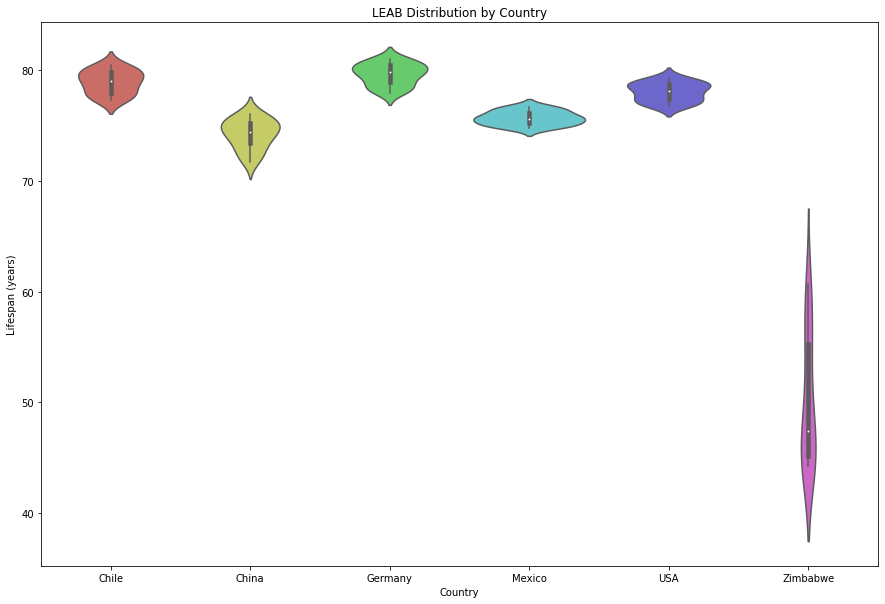

In [187]:
plt.figure(figsize = (15, 10))
sns.violinplot(x = gdp_data.Country, y = gdp_data.LEAB, palette = 'hls')
plt.title('LEAB Distribution by Country')
plt.ylabel('Lifespan (years)')
plt.show()

Here, we can more easily see that both Zimbabwe's mean life expectancy and distribution are quite a bit behind other countries' figures shown here in this category. Finally, let's take a look a a scatter plot of GDP to LEAB by country.

### Step 9: Visualization 7: GDP to LEAB by Country

By using scatter plots, we can directly see the link between the two important variables, GDP and LEAB. I'll plot them and determine if there is an identifiable relationship.

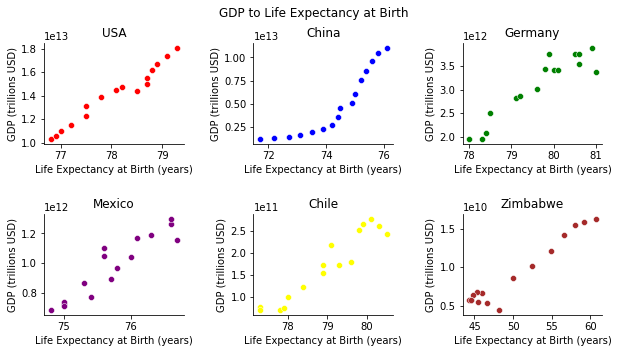

In [188]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle('GDP to Life Expectancy at Birth')


# USA
sns.scatterplot(
    ax = axes[0, 0], 
    x = gdp_data.LEAB[gdp_data.Country == 'USA'], 
    y = gdp_data.GDP[gdp_data.Country == 'USA'], 
    color = 'red')
axes[0, 0].set_title('USA')
axes[0, 0].set_xlabel('Life Expectancy at Birth (years)')
axes[0, 0].set_ylabel('GDP (trillions USD)')

# China
sns.scatterplot(
    ax = axes[0, 1], 
    x = gdp_data.LEAB[gdp_data.Country == 'China'], 
    y = gdp_data.GDP[gdp_data.Country == 'China'], 
    color = 'blue')
axes[0, 1].set_title('China')
axes[0, 1].set_xlabel('Life Expectancy at Birth (years)')
axes[0, 1].set_ylabel('GDP (trillions USD)')

# Germany
sns.scatterplot(
    ax = axes[0, 2], 
    x = gdp_data.LEAB[gdp_data.Country == 'Germany'], 
    y = gdp_data.GDP[gdp_data.Country == 'Germany'], 
    color = 'green')
axes[0, 2].set_title('Germany')
axes[0, 2].set_xlabel('Life Expectancy at Birth (years)')
axes[0, 2].set_ylabel('GDP (trillions USD)')

# Mexico
sns.scatterplot(
    ax = axes[1, 0], 
    x = gdp_data.LEAB[gdp_data.Country == 'Mexico'], 
    y = gdp_data.GDP[gdp_data.Country == 'Mexico'], 
    color = 'purple')
axes[1, 0].set_title('Mexico')
axes[1, 0].set_xlabel('Life Expectancy at Birth (years)')
axes[1, 0].set_ylabel('GDP (trillions USD)')

# Chile
sns.scatterplot(
    ax = axes[1, 1], 
    x = gdp_data.LEAB[gdp_data.Country == 'Chile'], 
    y = gdp_data.GDP[gdp_data.Country == 'Chile'], 
    color = 'yellow')
axes[1, 1].set_title('Chile')
axes[1, 1].set_xlabel('Life Expectancy at Birth (years)')
axes[1, 1].set_ylabel('GDP (trillions USD)')

# Zimbabwe
sns.scatterplot(
    ax = axes[1, 2], 
    x = gdp_data.LEAB[gdp_data.Country == 'Zimbabwe'], 
    y = gdp_data.GDP[gdp_data.Country == 'Zimbabwe'], 
    color = 'brown')
axes[1, 2].set_title('Zimbabwe')
axes[1, 2].set_xlabel('Life Expectancy at Birth (years)')
axes[1, 2].set_ylabel('GDP (trillions USD)')

# further editing
sns.despine()
plt.subplots_adjust(wspace = 0.5, hspace = 0.7)


Here we can see that the initial question has been answered! There appears to exist a positive correlation between GDP and life expectancy at birth for all six countries.

### Conclusion

Throughout this project, I identified my objectives, read in the needed files, arranged a pandas dataframe, and created a series of simple visualizations. What are some general insights? We found that:

- the United States has held the highest level of GDP from 2000-2015
- the effect of the 2008 financial crises can be seen through analyzing GDP levels over time (while LEAB levels are relatively unaffected)
- Zimbabwe's life expectancy at birth is very much lower than the other five countries, but the nation has seen large strides towards the rest of the world since its lowest point in 2004
- all six countries show a clear indication that GDP growth and LEAB growth are linked together
    
I hope that reading through this short project has both educated you and given you an understanding of my growing knowledge with data analysis. Thank you very much for taking the time to view it, and if you have any questions or comments, please let me know!